x	y
150 	 6.01999986544251 	 0.809062276898191
151 	 6.05999986454844 	 0.786461832658038
152 	 6.09999986365438 	 0.803585027418083
153 	 6.13999986276031 	 0.780501697756188
154 	 6.17999986186624 	 0.792926984547167
155 	 6.21999986097217 	 0.785445844724913
156 	 6.2599998600781 	 0.765080216539521
157 	 6.29999985918403 	 0.76681414558477
158 	 6.33999985828996 	 0.736615913248723
159 	 6.37999985739589 	 0.703285099378735
160 	 6.41999985650182 	 0.68194974716643
161 	 6.45999985560775 	 0.660521647000034
162 	 6.49999985471368 	 0.6527523924341
163 	 6.53999985381961 	 0.610356092871793
164 	 6.57999985292554 	 0.585948626919356
165 	 6.61999985203147 	 0.577704167115509
166 	 6.6599998511374 	 0.564719111077403
167 	 6.69999985024333 	 0.561046079404718
168 	 6.73999984934926 	 0.5546143962928
169 	 6.77999984845519 	 0.582492822322763
170 	 6.81999984756112 	 0.572939751613862
171 	 6.85999984666705 	 0.589751428824016
172 	 6.89999984577298 	 0.636378236048696
173 	 6.9399998

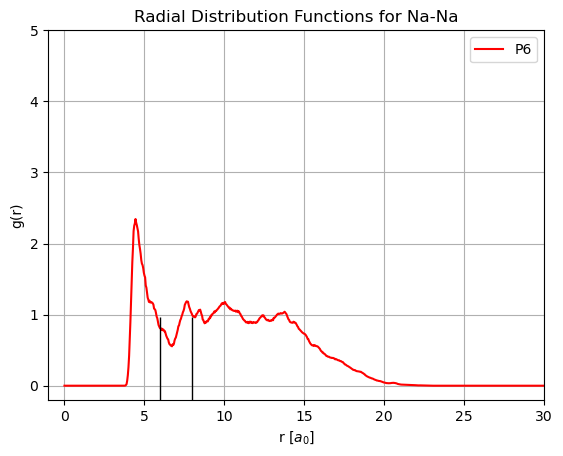

In [60]:
import matplotlib.pyplot as plt
from scipy import integrate
import math

###### MODIFY THIS BIT
pressure = 6
pair = '331' #pairs = ['111','121', '131', '221', '231','331']
###############

cell_lengths = [33.7316000000000, 32.0000000000000, 30.0000000000000, 28.4944116841394, 28.0563780094177, 26.8879850364710]
volume = cell_lengths[pressure-1] ** 3

if pair[1] == '1':
    no_of_atoms = 192
elif pair[1] == '2':
    no_of_atoms = 64
elif pair[1] == '3':
    no_of_atoms = 128
else:
    print('SOMETHING IS WRONG WITH THE PAIR')

rho = no_of_atoms / volume

######################

def calculate_cn(x_values, y_values, index_at_min, rho):
    to_be_integrated = [y * (x**2) for y, x in zip(y_values[:index_at_min], x_values[:index_at_min])]
    integral = integrate.trapezoid(to_be_integrated, x_values[:index_at_min])
    coordination_number = 4 * math.pi * rho * integral
    print('The coordination number is ' + str(coordination_number))

def pick_range(lower_index, upper_index, x_values, y_values):
    plt.plot(x_values[lower_index],0, marker = '|', color = 'black', markersize = 100)
    plt.plot(x_values[upper_index],0, marker = '|', color = 'black', markersize = 100)
    min_index = None
    if upper_index - lower_index <= 50:
        print('x\ty')
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            print(index+lower_index, '\t', values[0], '\t', values[1])
        lowest_value = min(y_values[lower_index:upper_index])
        for index, values in enumerate(zip(x_values[lower_index:upper_index],y_values[lower_index:upper_index])):
            if values[1] == lowest_value:
                print('The first minimum is at index ' + str(index+lower_index) + ' with x = ' + str(values[0]) + ' and y = ' + str(values[1])+'.')
                min_index = index + lower_index
                break
    return min_index

#######

parent_directory = 'D:/MSc/summer_project/'
directory = 'D:/MSc/summer_project/p' + str(pressure)
file_path = directory + '/rdf.out' + pair + '.txt'
with open(file_path, 'r') as file:
    data = file.readlines()
    x_values = []
    y_values = []
    for line in data:
        x, y = map(float, line.split())
        x_values.append(x)
        y_values.append(y)
        
label = 'P' + str(pressure)
colour = 'red'
plt.plot(x_values, y_values, label = label, color = colour)

plt.legend()
plt.xlim(-1,30)
plt.ylim(-0.2,5)
plt.xlabel('r [$a_0$]')
plt.ylabel('g(r)')
plt.grid(True)

title_label = ''
for character in pair[:-1]:
    if character == '1':
        title_label += 'O-'
    elif character == '2':
        title_label += 'C-'
    elif character == '3':
        title_label += 'Na-'
    else:
        print('Invalid character:', character)
        break
title_label = title_label[:-1]
plt.title('Radial Distribution Functions for ' + title_label)

#####

lower_index = 150
upper_index = 200
index_at_min = pick_range(lower_index, upper_index, x_values, y_values)
calculate_cn(x_values, y_values, index_at_min, rho)

In [70]:
import numpy as np

pair_names = ['O-O', 'O-C', 'O-Na', 'C-C', 'C-Na', 'Na-Na']

cns_111 = np.array([1.9999414379173608, 1.9999778067307972, 1.9999723391922388, 1.999971981856997, 1.9999718132408373, 1.9983359447793319])
cns_121 = np.array([0.9999753224423222, 0.9999753417280246, 0.9999518940905913, 0.9999778212681218, 0.9999777743971037, 0.9999514256688805])
cns_131 = np.array([3.724816303694887, 4.166433192992824,4.587738539774322, 4.965366755333836, 4.8504937263737595, 4.873271726531595])
cns_221 = np.array([2.5135714487426055,2.4176796401745597,3.0061924291985007, 3.9681262384803864, 3.9459380894422953, 3.648468508725892])
cns_231 = np.array([8.997868584151648, 9.944903224482006, 10.54948413690671, 11.184236619476556, 10.634479039975135, 10.981998213611014])
cns_331 = np.array([8.490881358782193, 8.27541059528106, 7.368510144260339, 8.301035589149823,6.403578649128797, 7.414861363271539])

cns_allpairs = [cns_111, cns_121, cns_131, cns_221, cns_231, cns_331]
cn_means = []
cn_medians = []

print('Pair\tCN (mean)\tCN (median)')
for i in range(6):
    if len(cns_allpairs[i]) == 6:
        pass
    else:
        print('something is wrong')
        break
    mean = np.mean(cns_allpairs[i])
    median = np.median(cns_allpairs[i])
    cn_means.append(mean)
    cn_medians.append(median)
    print(pair_names[i], '\t', str(mean), '\t', str(median))


Pair	CN (mean)	CN (median)
O-O 	 1.9996952206195937 	 1.9999718975489171
O-C 	 0.9999682632658408 	 0.9999753320851734
O-Na 	 4.528020040783537 	 4.71911613307404
C-C 	 3.249996059127373 	 3.327330468962196
C-Na 	 10.382161636433844 	 10.591981588440923
Na-Na 	 7.7090462833122935 	 7.8451359792763
